In [2]:
import quandl
quandl.ApiConfig.api_key = "7Q4wozR65PN8cf5cDsH-"
import pandas as pd
import math ,datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

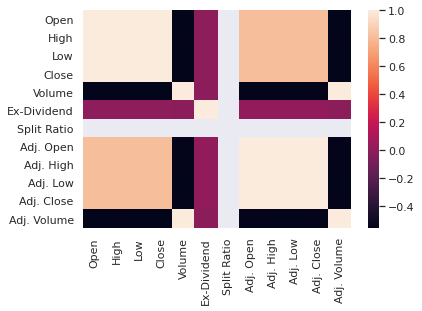

In [4]:
import seaborn as sns
sns.set()
sns.heatmap(df.corr())

In [5]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [6]:
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_CHANGE']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0


In [7]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_CHANGE
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658


In [8]:
df=df[['Adj. Close','HL_PCT','PCT_CHANGE','Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


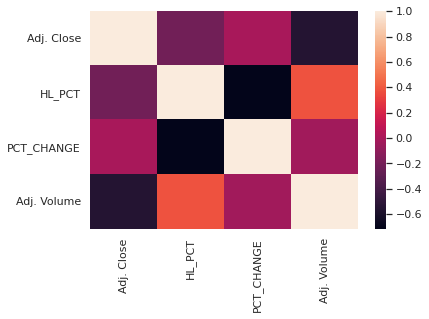

In [9]:
sns.heatmap(df.corr())

In [10]:
forecast_col='Adj. Close'
df.fillna(-99999,inplace=True)
forecast_out=int(math.ceil(0.01*len(df)))

In [11]:
df.count()

Adj. Close     3424
HL_PCT         3424
PCT_CHANGE     3424
Adj. Volume    3424
dtype: int64

In [12]:
df['label']=df[forecast_col].shift(-forecast_out)

In [13]:
df.head()
df.tail()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0,NaN
2018-03-22,1053.15,2.921711,-2.487014,3418154.0,NaN
2018-03-23,1026.55,3.918952,-2.360729,2413517.0,NaN
2018-03-26,1054.09,0.491419,0.332191,3272409.0,NaN
2018-03-27,1006.94,5.720301,-5.353887,2940957.0,NaN


In [14]:
df.dropna(inplace=True)
df.tail()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,0.896914,-0.029718,1792602.0,1094.00
2018-01-31,1182.22,0.346805,-0.134312,1643877.0,1053.15
2018-02-01,1181.59,0.495942,0.476195,2774967.0,1026.55
2018-02-02,1119.20,1.081129,-0.729098,5798880.0,1054.09
2018-02-05,1068.76,4.325574,-2.893850,3742469.0,1006.94


In [15]:
X=np.array(df.drop(['label'],1))
y=np.array(df['label'])

In [16]:
#X=X[:-forecast_out]
X_lately=X[-forecast_out:]

In [17]:
print(len(X),len(y))

3389 3389


In [18]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
Clf = KNeighborsRegressor(n_neighbors=24)
Clf.fit(x_train, y_train)
accuracy=Clf.score(x_test,y_test)
forecast_set=Clf.predict(X_lately)
print("Accuracy=",accuracy)

Accuracy= 0.7270718203522519


In [20]:
Clf = RandomForestRegressor(max_depth=50, random_state=0)
Clf.fit(x_train, y_train)
accuracy=Clf.score(x_test,y_test)
forecast_set=Clf.predict(X_lately)
print("Accuracy=",accuracy)

Accuracy= 0.9839764675272272


In [21]:
Clf=LinearRegression(n_jobs=-1)
Clf.fit(x_train, y_train)
accuracy=Clf.score(x_test,y_test)
forecast_set=Clf.predict(X_lately)
print("Accuracy=",accuracy)

Accuracy= 0.9792158886033372


In [22]:
df['forecast']=np.nan
last_date=df.iloc[-1].name
print(last_date)
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day
#%matplotlib qt

2018-02-05 00:00:00


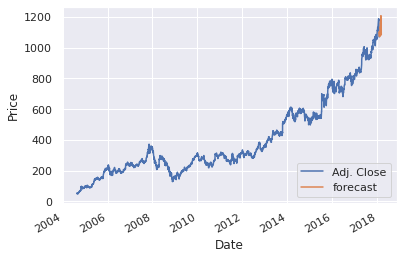

                     Adj. Close  HL_PCT  PCT_CHANGE  Adj. Volume  label  \
Date                                                                      
2018-02-06 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-07 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-08 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-09 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-10 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-11 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-12 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-13 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-14 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-15 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-16 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-02-17 05:30:00      

In [23]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
print(df.tail(35))